Download dataset from Kaggle

In [113]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [114]:
competition = 'digit-recognizer'
api.competitions_list(search=competition)[0]

https://www.kaggle.com/competitions/digit-recognizer

In [115]:
api.competition_list_files(competition)

[sample_submission.csv, train.csv, test.csv]

In [116]:
api.competition_download_files(competition,
                               path='data\\')

In [117]:
import os
from zipfile import ZipFile
zf = ZipFile('data\\digit-recognizer.zip')
zf.extractall(path='data\\')
zf.close()
os.remove('data\digit-recognizer.zip')

Read data

In [118]:
import pandas as pd
train_df = pd.read_csv('data\\train.csv')

In [119]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


42000 samples  
label, 28*28=784 pixel values

Split into features and labels

In [120]:
train_y_df = train_df['label']
train_y_df

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [126]:
train_x_df = train_df.drop('label', axis=1)
train_x_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Form Tensors

In [125]:
import torch
y_train = torch.Tensor(train_y_df.values)
train_x_df = train_x_df/255
X_train = torch.Tensor(train_x_df.values).reshape(-1, 1, 28, 28)

torch.save(y_train, 'data\\y_train.pt')
torch.save(X_train, 'data\\X_train.pt')

Data overview

Label:  1


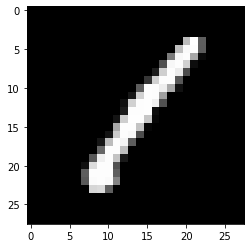

In [123]:
import matplotlib.pyplot as plt

idx = 0
img = X_train[idx]
print("Label: ", int(y_train[idx]))
plt.imshow(img.permute(1, 2, 0), cmap='gray')


In [124]:
train_y_df.value_counts(normalize=True)

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

Split of samples between classes is ok